<a href="https://colab.research.google.com/github/xyvlin/machine_learning_hw/blob/main/adaboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [ ]:
class AdaBoost:
  def __init__(self, rounds):
    self.rounds = rounds
    self.a = []
    self.models = []

  def fit(self, X, y):
    n = X.shape[0]
    w = np.full(n,1/n)
    for j in range(self.rounds):
      model = DecisionTreeClassifier(max_depth=1)
      model.fit(X, y, sample_weight=w)
      pred = model.predict(X)
      err = w.dot(pred != y)+1e-10
      a = 0.5 * np.log((1 - err) / err)
      w = w * np.exp(-a * y * pred)
      w = w / w.sum()
      self.a.append(a)
      self.models.append(model)

  def predict(self, X):
    n = X.shape[0]
    pred = np.zeros(n)
    for i in range(self.rounds):
      pred += self.a[i] * self.models[i].predict(X)
    return np.sign(pred)

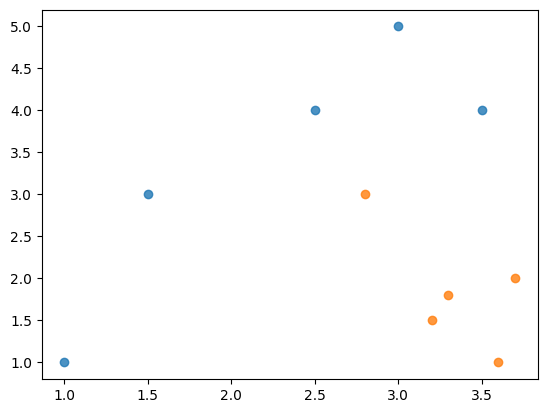

In [ ]:
X = np.array([
    [1, 1], [1.5, 3], [2.5, 4], [3, 5], [3.5, 4],
    [2.8, 3], [3.2, 1.5], [3.3, 1.8], [3.6, 1], [3.7, 2]
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.8)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.8)

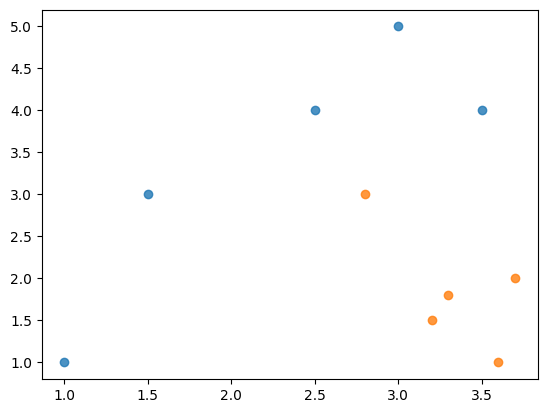

In [ ]:
ada = AdaBoost(3)
ada.fit(X, y)
y_pred = ada.predict(X)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.8)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.8)

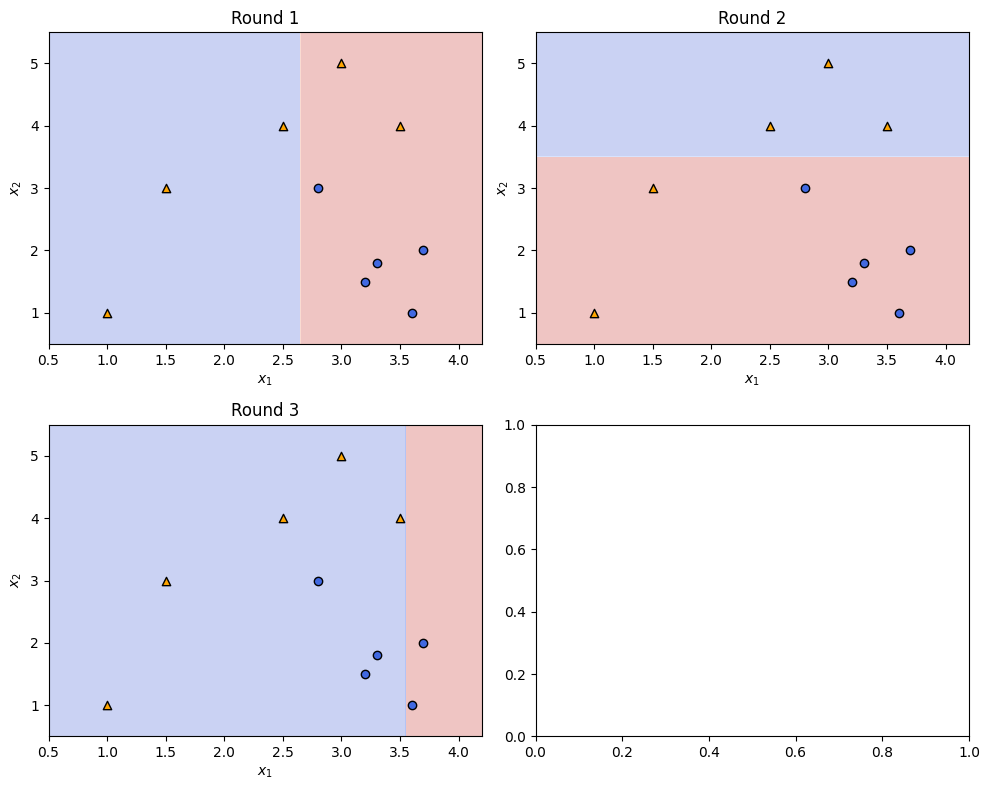

In [ ]:
def plot_decision_boundary(ax, clf, X, y, title):
    # Meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot samples
    for i in range(len(X)):
        if y[i] == 1:
            ax.scatter(X[i, 0], X[i, 1], c='royalblue', edgecolors='k')
        else:
            ax.scatter(X[i, 0], X[i, 1], c='orange', marker='^', edgecolors='k')

    ax.set_title(title)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')

# Final multi-panel plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i in range(3):
    plot_decision_boundary(axes[i], ada.models[i], X, y, f"Round {i+1}")

plt.tight_layout()
plt.show()